# Problem Statement

### Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts.

1) The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a
product by InterviewBit.
2) Being working as a data scientist with the analytics vertical of Scaler, focused on profiling the best companies and job positions to work for from the Scaler database.
3) I am provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these
clusters should have similar characteristics.

In [1]:
# Import lablaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the dataset

scaler = pd.read_csv('scaler_kmeans.csv')

# Data Dictionary of scaler Dataset:

In [3]:
scaler.head() # check top 5 row

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [4]:
scaler.drop('Unnamed: 0',axis=1, inplace= True) # dropping index column
scaler.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [5]:
scaler.shape # Shape of the data

(205843, 6)

In [6]:
scaler.company_hash.nunique() # Total number of unique employers

37299

In [7]:
scaler.email_hash.nunique() # Total number of unique Email indentities

153443

In [8]:
scaler.job_position.nunique() # Total number of Job positions

1017

In [9]:
scaler.orgyear.nunique() # Total number of unique employee start year

77

In [10]:
scaler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153281 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.4+ MB


## Checking the null value percentage

In [11]:
scaler.isnull().sum()/len(scaler)*100 # percentage of missing value in each column

company_hash         0.021376
email_hash           0.000000
orgyear              0.041779
ctc                  0.000000
job_position        25.534995
ctc_updated_year     0.000000
dtype: float64

In [12]:
positions = scaler.job_position.value_counts().index.to_list()
jobcount = scaler.job_position.value_counts().to_list()
totaljobs = pd.DataFrame({'pos':positions, 'count':jobcount})
totaljobs.head()

,pos,count
0,Backend Engineer,43554
1,FullStack Engineer,24717
2,Other,18071
3,Frontend Engineer,10417
4,Engineering Leadership,6870


Text(0.5, 1.0, 'the top 20 most frequent job roles')

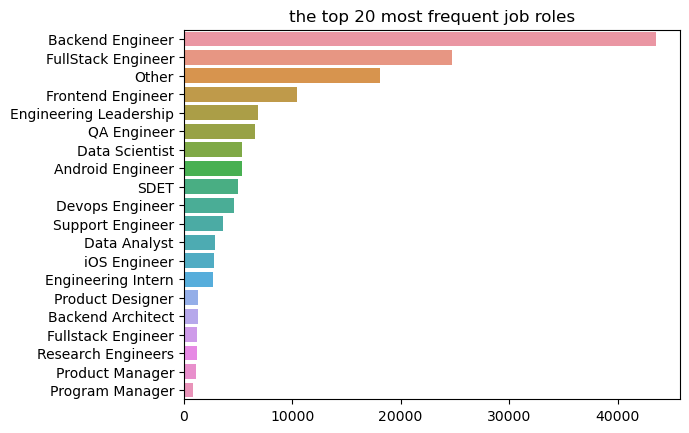

In [13]:
# plt.figure = (10,8)
sns.barplot(y= positions[:20], x=jobcount[:20], data = totaljobs)
plt.title('the top 20 most frequent job roles')

# Analysis of ctc of job holders

In [14]:
scaler.ctc.describe() # summary of ctc

count    2.058430e+05
mean     2.271685e+06
std      1.180091e+07
min      2.000000e+00
25%      5.300000e+05
50%      9.500000e+05
75%      1.700000e+06
max      1.000150e+09
Name: ctc, dtype: float64

In [15]:
min(scaler.ctc), max(scaler.ctc) # min and max of ctc

(2, 1000150000)

In [16]:
from sklearn.neighbors import LocalOutlierFactor # checking outlier using lof
clf = LocalOutlierFactor(n_neighbors = 50, contamination=0.2)
preds = clf.fit_predict(np.array(scaler.ctc).reshape(-1,1))
preds

array([ 1, -1,  1, ...,  1,  1,  1])

In [17]:
scaler['outleir'] = preds
scaler.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,outleir
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,1
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0,-1
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,1
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,1
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0,1


In [18]:
scalerdata_processed = scaler.loc[scaler.outleir==1]
scalerdata_processed

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,outleir
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,1
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,1
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,1
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0,1
5,yvuuxrj hzbvqqxta bvqptnxzs ucn rna,18f2c4aa2ac9dd3ae8ff74f32d30413f5165565b90d8f2...,2018.0,700000,FullStack Engineer,2020.0,1
...,...,...,...,...,...,...,...
205838,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,NaN,2019.0,1
205839,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,NaN,2020.0,1
205840,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,NaN,2021.0,1
205841,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,NaN,2019.0,1


In [19]:
scalerdata_processed.isnull().sum()/len(scalerdata_processed)*100

company_hash         0.020611
email_hash           0.000000
orgyear              0.041738
ctc                  0.000000
job_position        25.985984
ctc_updated_year     0.000000
outleir              0.000000
dtype: float64

In [20]:
scalerdata_processed = scalerdata_processed.loc[~scalerdata_processed.duplicated()]
len(scalerdata_processed)

194039

### Removing extremely high CTCs which behave like outliers


In [21]:
scalerdata_processed = scalerdata_processed.loc[scalerdata_processed.ctc<100000000]
len(scalerdata_processed)

193108

In [22]:
jobavg_sal = scalerdata_processed[['job_position','ctc']].groupby('job_position').mean().reset_index().sort_values('ctc',ascending= False)
jobavg_sal["ctc"] = round(jobavg_sal.ctc,2)
jobavg_sal.head()

,job_position,ctc
569,Security Intern,11000000.0
224,Electric power supply,10000000.0
882,Toyota,10000000.0
82,"Associate Director, Online Products",7000000.0
611,"Senior Manager, Online Products",7000000.0


In [23]:
jobavg_sal.loc[jobavg_sal["job_position"]=="Backend Engineer"]

,job_position,ctc
128,Backend Engineer,1508207.54


In [24]:
x = jobavg_sal.job_position.to_list()
y = jobavg_sal.ctc.to_list()
jobsal_dict = dict(zip(x,y))
jobsal_dict["Backend Engineer"]


1508207.54

In [25]:
joblist = scalerdata_processed.job_position.to_list()
jobsal = []
for jobs in joblist:
    if pd.isnull(jobs):
        jobsal.append(None)
    else:
        jobsal.append(jobsal_dict[jobs])
len(jobsal)

193108

In [26]:
df = scaler[:]
scalerdata_processed['job_position_encoded'] = jobsal
scalerdata_processed.head(-5)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,outleir,job_position_encoded
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,1,1077581.20
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,1,1508207.54
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,1,1508207.54
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0,1,1251468.13
5,yvuuxrj hzbvqqxta bvqptnxzs ucn rna,18f2c4aa2ac9dd3ae8ff74f32d30413f5165565b90d8f2...,2018.0,700000,FullStack Engineer,2020.0,1,1251468.13
...,...,...,...,...,...,...,...,...
205832,oyhnnr,871201225ef08d05e84e4e04723d5ade66d9fd40e55667...,2014.0,1800000,NaN,2018.0,1,NaN
205833,vbvkgz,f4415be48a1ef885e086dcd72181f667a289641e66f828...,2014.0,3800000,NaN,2019.0,1,NaN
205834,wyvqntq wgbbhzxwvnxgzo,7dd3d0d543874c1250af3d16266923a77c0b824540d89a...,2020.0,100000,NaN,2019.0,1,NaN
205836,mvqwrvjo,53442a1663ccfdbd473055fee4e4ac9f4bb398dc446242...,2011.0,2250000,NaN,2019.0,1,NaN


In [27]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors= 25)
jobpos_impute = imputer.fit_transform(np.array(scalerdata_processed.job_position_encoded).reshape(-1,1))

In [28]:
scalerdata_processed['job_position_encoded'] = np.round(jobpos_impute,2)
scalerdata_processed

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,outleir,job_position_encoded
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,1,1077581.20
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,1,1508207.54
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,1,1508207.54
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0,1,1251468.13
5,yvuuxrj hzbvqqxta bvqptnxzs ucn rna,18f2c4aa2ac9dd3ae8ff74f32d30413f5165565b90d8f2...,2018.0,700000,FullStack Engineer,2020.0,1,1251468.13
...,...,...,...,...,...,...,...,...
205838,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,NaN,2019.0,1,1356811.00
205839,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,NaN,2020.0,1,1356811.00
205840,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,NaN,2021.0,1,1356811.00
205841,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,NaN,2019.0,1,1356811.00


In [29]:
scalerdata_processed.job_position.fillna(value = 'other', inplace= True)
scalerdata_processed

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,outleir,job_position_encoded
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,1,1077581.20
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,1,1508207.54
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,1,1508207.54
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0,1,1251468.13
5,yvuuxrj hzbvqqxta bvqptnxzs ucn rna,18f2c4aa2ac9dd3ae8ff74f32d30413f5165565b90d8f2...,2018.0,700000,FullStack Engineer,2020.0,1,1251468.13
...,...,...,...,...,...,...,...,...
205838,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,other,2019.0,1,1356811.00
205839,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,other,2020.0,1,1356811.00
205840,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,other,2021.0,1,1356811.00
205841,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,other,2019.0,1,1356811.00


In [30]:
scalerdata_processed.isnull().sum()/len(scalerdata_processed)*100

company_hash            0.020714
email_hash              0.000000
orgyear                 0.041428
ctc                     0.000000
job_position            0.000000
ctc_updated_year        0.000000
outleir                 0.000000
job_position_encoded    0.000000
dtype: float64

In [31]:
scalerdata_processed.dropna(inplace = True)
scalerdata_processed.isnull().sum()/len(scalerdata_processed)*100

company_hash            0.0
email_hash              0.0
orgyear                 0.0
ctc                     0.0
job_position            0.0
ctc_updated_year        0.0
outleir                 0.0
job_position_encoded    0.0
dtype: float64

In [32]:
presentyear = 2023
totalexp = presentyear - scalerdata_processed.orgyear
scalerdata_processed['YOE'] = totalexp
scalerdata_processed.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,outleir,job_position_encoded,YOE
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,1,1077581.20,7.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,1,1508207.54,8.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,1,1508207.54,6.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0,1,1251468.13,6.0
5,yvuuxrj hzbvqqxta bvqptnxzs ucn rna,18f2c4aa2ac9dd3ae8ff74f32d30413f5165565b90d8f2...,2018.0,700000,FullStack Engineer,2020.0,1,1251468.13,5.0


In [33]:
scalerdata_processed.to_csv('scalerdata_processed.csv',index=False)

## Regex replacing company names

In [34]:
scalerdata_processed.company_hash.replace(r'[^A-Za-z0-9 ]+', '',inplace=True)


In [35]:
salarytop20_ctc = scalerdata_processed.groupby("company_hash").mean().reset_index().sort_values('ctc',ascending = False)[["company_hash","ctc"]]
salarytop20_ctc = pd.DataFrame(salarytop20_ctc).head(20)
salarytop20_ctc

C:\Users\5040876\AppData\Local\Temp\ipykernel_3096\1409952553.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  salarytop20_ctc = scalerdata_processed.groupby("company_hash").mean().reset_index().sort_values('ctc',ascending = False)[["company_hash","ctc"]]


,company_hash,ctc
21685,tbtqogz uqgwtoo bvzvstbtzn xzaxv,83000000.0
8107,hwow,80350000.0
25912,vmyxzvc ghnoghqwxzs,80000000.0
11530,ngu srgct wgqugqvnxgz mya,80000000.0
1994,bgmxuvj,80000000.0
30937,xbs srgmvr xzegntwy,80000000.0
26270,vppv ntwyzgrgsxto,80000000.0
20986,srgqj uyvqbv nxqhuvnyx,80000000.0
3514,bxpvzg xzntqzvnxgzvr rxbxnta,80000000.0
23929,urhqvroxsyn,80000000.0


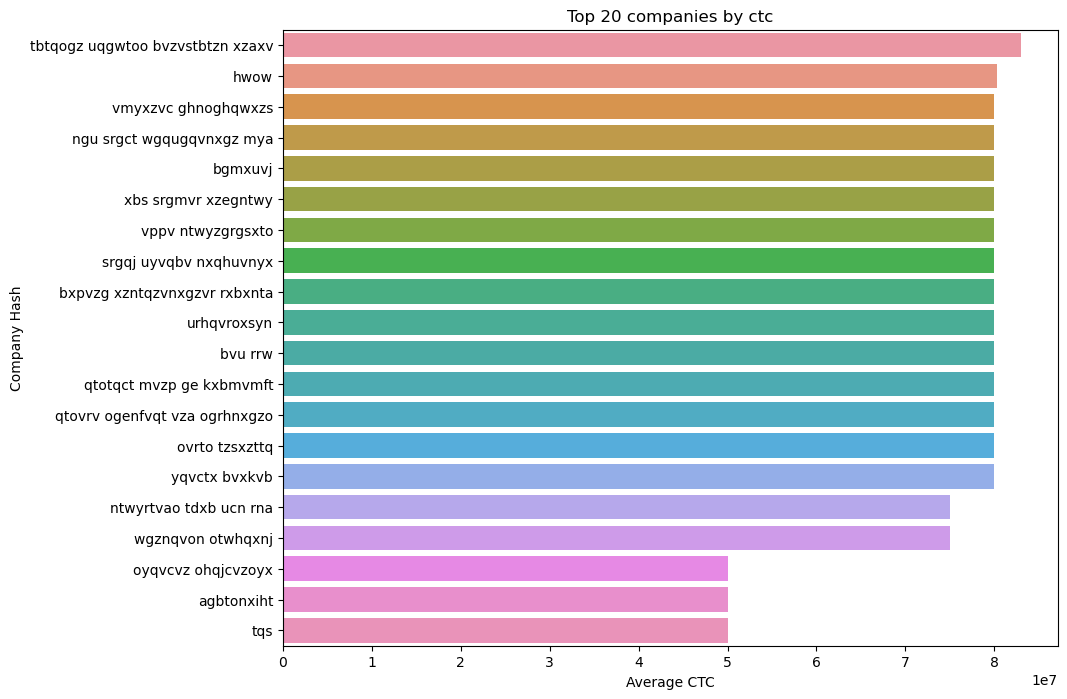

In [36]:
plt.figure(figsize=(10, 8))
top20_ctc = salarytop20_ctc.head(20)
sns.barplot(y=top20_ctc["company_hash"], x=top20_ctc["ctc"])
plt.title("Top 20 companies by ctc")
plt.xlabel("Average CTC")
plt.ylabel("Company Hash")
plt.show()

In [37]:
salarytop20_ctc = scalerdata_processed.groupby("company_hash").mean().reset_index().sort_values('ctc',ascending = True)[["company_hash","ctc"]]
salarytop20_ctc = pd.DataFrame(salarytop20_ctc).head(20)
salarytop20_ctc

C:\Users\5040876\AppData\Local\Temp\ipykernel_3096\1335408410.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  salarytop20_ctc = scalerdata_processed.groupby("company_hash").mean().reset_index().sort_values('ctc',ascending = True)[["company_hash","ctc"]]


,company_hash,ctc
8213,hzxctqoxava wtznqvr bvqnv vmqth at rvo cxrrvo,1000.0
2386,bnyqtt wgzohrnxzs,1000.0
5835,evxqmxn,1000.0
20005,rvygqt hzxctqoxnj ge bvzvstbtzn owxtzwto,1000.0
22917,tzavcv,1000.0
8216,hzxctqoxnj ge ayvpv,1000.0
24551,uvznohxn uqgetooxgzvr,1000.0
30225,wvunxej,1000.0
4113,ctnntqj,1000.0
18057,pzgn bj jvwyn,1000.0


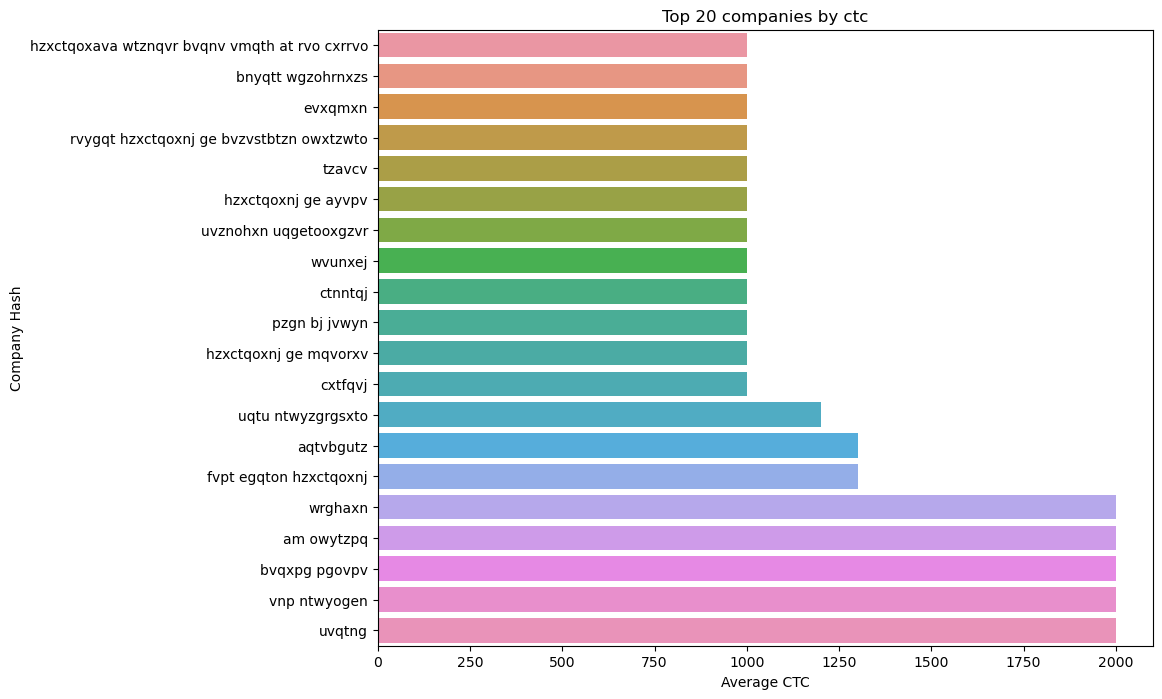

In [38]:
plt.figure(figsize=(10, 8))
top20_ctc = salarytop20_ctc.head(20)
sns.barplot(y=top20_ctc["company_hash"], x=top20_ctc["ctc"])
plt.title("Top 20 companies by ctc")
plt.xlabel("Average CTC")
plt.ylabel("Company Hash")
plt.show()

In [55]:
import pandas as pd

# Assuming scalerdata_processed is your DataFrame
data_job_group_desc = scalerdata_processed.groupby("job_position").mean(numeric_only=True).reset_index().sort_values('ctc', ascending=False)[["job_position", "ctc"]]
data_job_group_asc = scalerdata_processed.groupby("job_position").mean(numeric_only=True).reset_index().sort_values('ctc', ascending=True)[["job_position", "ctc"]]


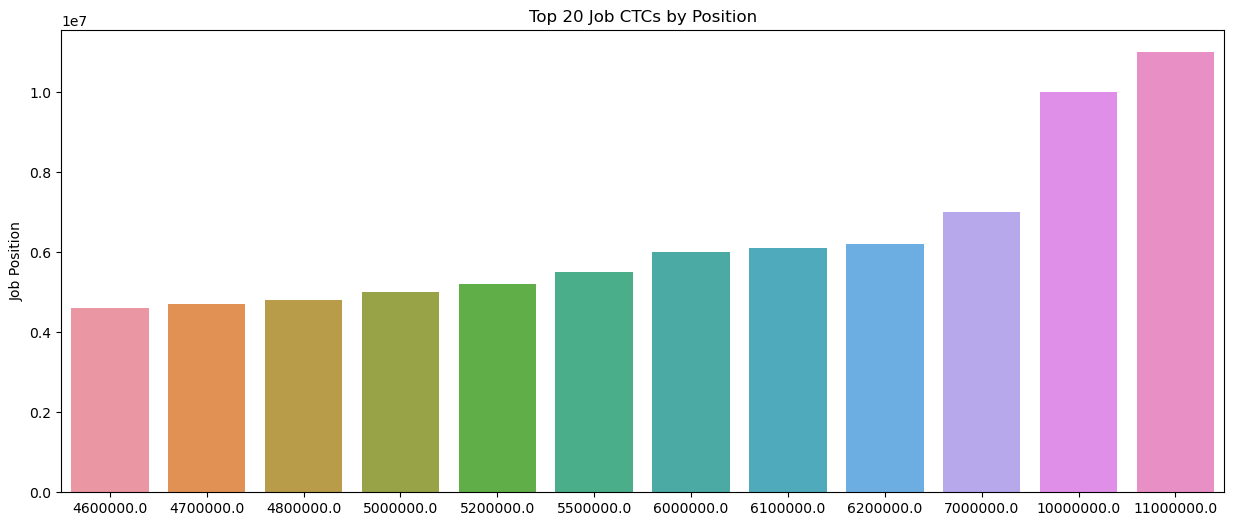

In [72]:
plt.figure(figsize=(15, 6))
y = top20_pos["job_position"].to_list()
y = top20_pos["ctc"].to_list() 
sns.barplot(y=y, x=x) 
plt.title("Top 20 Job CTCs by Position")
plt.ylabel("Job Position")
plt.show()

Text(0.5, 1.0, 'bottom 20 job ctcs')

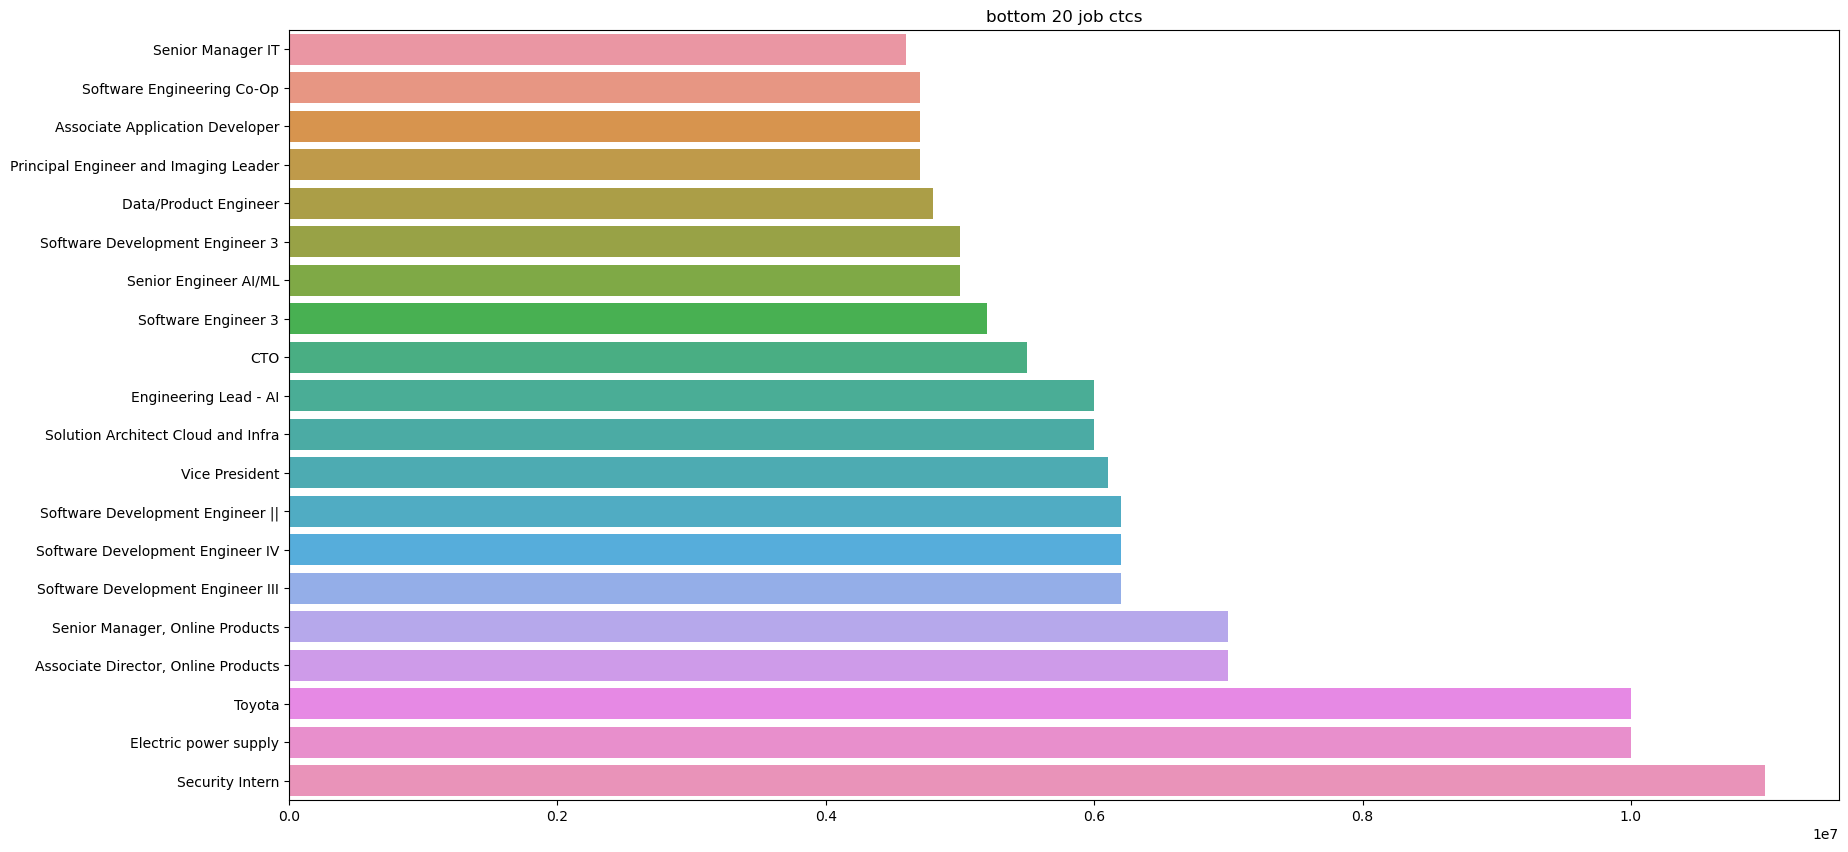

In [73]:
plt.figure(figsize = (20,10))
y = bot20_pos["job_position"].to_list()
x= bot20_pos["ctc"].to_list()
sns.barplot(y = y, x =x)
plt.title("bottom 20 job ctcs")

In [74]:
top20_yoe = scalerdata_processed.groupby("YOE").mean().reset_index().sort_values('ctc',ascending = False)[["YOE","ctc"]][:20]
bot20_yoe = scalerdata_processed.groupby("YOE").mean().reset_index().sort_values('ctc',ascending= True)[["YOE","ctc"]][:20]

C:\Users\5040876\AppData\Local\Temp\ipykernel_3096\1016700124.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top20_yoe = scalerdata_processed.groupby("YOE").mean().reset_index().sort_values('ctc',ascending = False)[["YOE","ctc"]][:20]
C:\Users\5040876\AppData\Local\Temp\ipykernel_3096\1016700124.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bot20_yoe = scalerdata_processed.groupby("YOE").mean().reset_index().sort_values('ctc',ascending= True)[["YOE","ctc"]][:20]


In [75]:
top20_yoe = top20_yoe[(top20_yoe["YOE"]>0) & (top20_yoe["YOE"]<60)]

In [76]:
top20_yoe.sort_values("YOE")


,YOE,ctc
33,21.0,2.854757e+06
34,22.0,2.824300e+06
35,23.0,3.103197e+06
36,24.0,3.075714e+06
37,25.0,2.852768e+06
38,26.0,2.950847e+06
39,27.0,2.564756e+06
41,29.0,2.710804e+06
42,30.0,2.585531e+06
45,33.0,3.289219e+06


Text(0.5, 1.0, 'top 20 job ctc by experience')

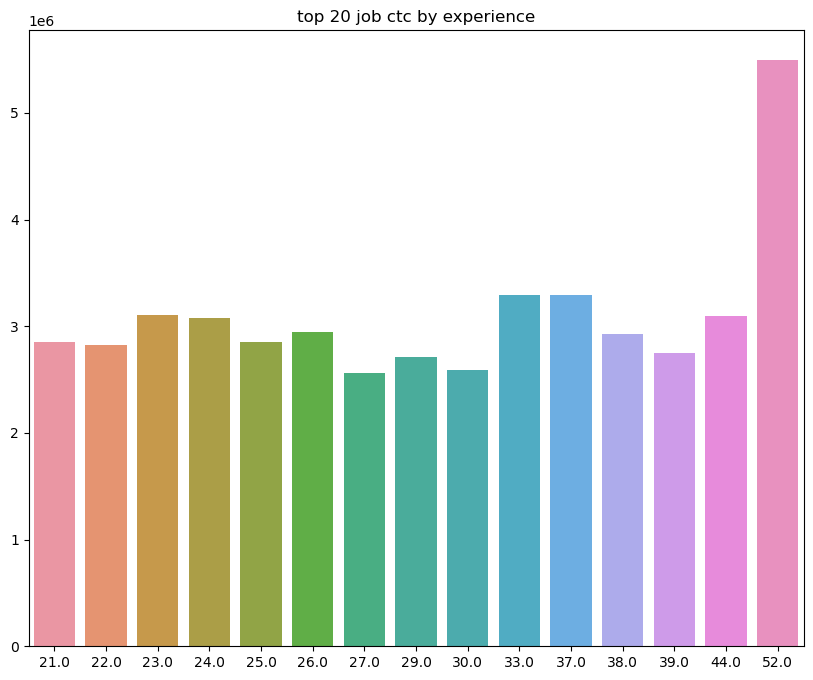

In [77]:
plt.figure(figsize = (10,8))
y = top20_yoe["YOE"].to_list()
x= top20_yoe["ctc"].to_list()
sns.barplot(y = x, x =y)
plt.title("top 20 job ctc by experience")

In [78]:
scalerdata_processed.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,outleir,job_position_encoded,YOE
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,1,1077581.20,7.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,1,1508207.54,8.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,1,1508207.54,6.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0,1,1251468.13,6.0
5,yvuuxrj hzbvqqxta bvqptnxzs ucn rna,18f2c4aa2ac9dd3ae8ff74f32d30413f5165565b90d8f2...,2018.0,700000,FullStack Engineer,2020.0,1,1251468.13,5.0


# MANUAL CLUSTERING


1) we will do manual clustering on ctc of each learner
2) learners having ctc having gretar than 15 percent ctc of same job avg salary are upper outliers assigning them as tier 1
3) learners having ctc range in between upper 15 to below 15 percent of the avg ctc are regulars assigned as tier 2
4) learners having less than 15 ctc of avg ctc of same job postion are lower outliers assigning them as tier 3

In [79]:
scaler_ctc = scalerdata_processed[["company_hash","email_hash","ctc","job_position"]]
scaler_ctc.head()

,company_hash,email_hash,ctc,job_position
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,1100000,Other
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2000000,Backend Engineer
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,700000,Backend Engineer
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,1400000,FullStack Engineer
5,yvuuxrj hzbvqqxta bvqptnxzs ucn rna,18f2c4aa2ac9dd3ae8ff74f32d30413f5165565b90d8f2...,700000,FullStack Engineer


In [80]:
jobsavgsal = jobavg_sal.job_position.to_list()
salaryctc = jobavg_sal.ctc.to_list()
jobsal_dict = dict([(x,y) for x,y in zip(jobsavgsal,salaryctc)])

In [81]:
jobs = scaler_ctc.job_position.to_list()
sals = scaler_ctc.ctc.to_list()
categories = []

for i in range(len(jobs)):
    cur_sal = jobsal_dict.get(jobs[i], 0)  # Default value is 0 if the key is not found
    
    if sals[i] > cur_sal + 0.15 * cur_sal:
        categories.append(1)
    elif (cur_sal - 0.15 * cur_sal) <= sals[i] <= (cur_sal + 0.15 * cur_sal):
        categories.append(2)
    else:
        categories.append(3)

len(categories), len(scaler_ctc)


(192988, 192988)

In [82]:
scaler_ctc["designation"] = categories[:]
scaler_ctc.head()

C:\Users\5040876\AppData\Local\Temp\ipykernel_3096\274659346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaler_ctc["designation"] = categories[:]


,company_hash,email_hash,ctc,job_position,designation
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,1100000,Other,2
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2000000,Backend Engineer,1
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,700000,Backend Engineer,3
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,1400000,FullStack Engineer,2
5,yvuuxrj hzbvqqxta bvqptnxzs ucn rna,18f2c4aa2ac9dd3ae8ff74f32d30413f5165565b90d8f2...,700000,FullStack Engineer,3


Text(0.5, 1.0, 'count of salary by ties')

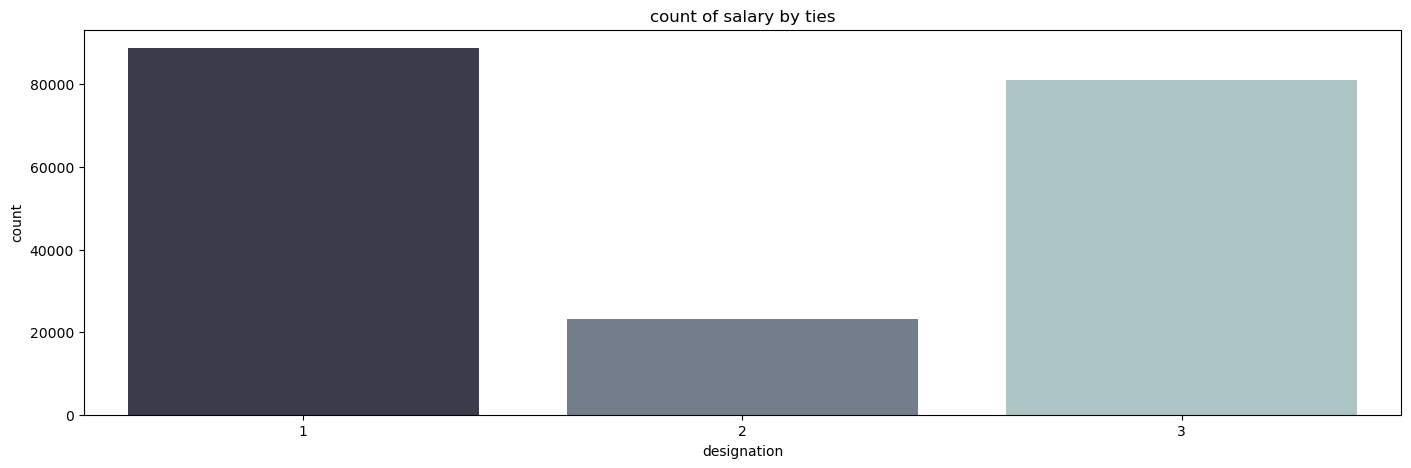

In [83]:
plt.figure(figsize = (17,5))
sns.countplot(x = scaler_ctc['designation'], palette = 'bone')
plt.title("count of salary by ties")


## Analysing using job position level


In [84]:
classes = []
jobs = scaler_ctc.job_position.to_list()
salary = scaler_ctc.ctc.to_list()
for sal in salary:
    if sal >= 2000000:
        classes.append(1)
    elif sal< 2000000 and sal >=1000000:
        classes.append(2)
    else:
        classes.append(3)
scaler_ctc["class"]= classes
scaler_ctc.head(20)


C:\Users\5040876\AppData\Local\Temp\ipykernel_3096\3893176320.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaler_ctc["class"]= classes


,company_hash,email_hash,ctc,job_position,designation,class
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,1100000,Other,2,2
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2000000,Backend Engineer,1,1
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,700000,Backend Engineer,3,3
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,1400000,FullStack Engineer,2,2
5,yvuuxrj hzbvqqxta bvqptnxzs ucn rna,18f2c4aa2ac9dd3ae8ff74f32d30413f5165565b90d8f2...,700000,FullStack Engineer,3,3
6,lubgqsvz wyvot wg,9bf128ae3f4ea26c7a38b9cdc58cf2acbb8592100c4128...,1500000,FullStack Engineer,1,2
7,vwwtznhqt ntwyzgrgsj,756d35a7f6bb8ffeaffc8fcca9ddbb78e7450fa0de2be0...,400000,Backend Engineer,3,3
8,utqoxontzn ojontbo,e245da546bf50eba09cb7c9976926bd56557d1ac9a17fb...,450000,other,1,3
9,xrbhd,b2dc928f4c22a9860b4a427efb8ab761e1ce0015fba1a5...,360000,other,1,3
10,ztfstz ogenfvqt,580f6368103ecb3c4f90245af63340e0b8a7a2dc946c1c...,420000,FullStack Engineer,3,3


## Analysis by company level
. categorizing by mean salary provided


In [85]:
companycat = scaler_ctc.groupby("company_hash").mean().reset_index().sort_values("ctc",ascending=False)
companycat

C:\Users\5040876\AppData\Local\Temp\ipykernel_3096\3853809549.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  companycat = scaler_ctc.groupby("company_hash").mean().reset_index().sort_values("ctc",ascending=False)


,company_hash,ctc,designation,class
21685,tbtqogz uqgwtoo bvzvstbtzn xzaxv,83000000.0,1.0,1.0
8107,hwow,80350000.0,1.0,1.0
25912,vmyxzvc ghnoghqwxzs,80000000.0,1.0,1.0
11530,ngu srgct wgqugqvnxgz mya,80000000.0,1.0,1.0
1994,bgmxuvj,80000000.0,1.0,1.0
...,...,...,...,...
8232,hzxctqoxnj ge mqvorxv,1000.0,3.0,3.0
4113,ctnntqj,1000.0,3.0,3.0
18057,pzgn bj jvwyn,1000.0,3.0,3.0
22917,tzavcv,1000.0,3.0,3.0


In [86]:
thr3 = np.percentile(companycat.ctc,50)
thr2 = np.percentile(companycat.ctc,75)
thr1 = np.percentile(companycat.ctc,90)

In [87]:
tier = []
ctcs = companycat.ctc.to_list()
for ctc in ctcs:
    if ctc >= thr1:
        tier.append(1)
    elif ctc<thr1 and ctc>= thr2:
        tier.append(2)
    else:
        tier.append(3)
        
companycat["tier"] = tier
companycat.head()

,company_hash,ctc,designation,class,tier
21685,tbtqogz uqgwtoo bvzvstbtzn xzaxv,83000000.0,1.0,1.0,1
8107,hwow,80350000.0,1.0,1.0,1
25912,vmyxzvc ghnoghqwxzs,80000000.0,1.0,1.0,1
11530,ngu srgct wgqugqvnxgz mya,80000000.0,1.0,1.0,1
1994,bgmxuvj,80000000.0,1.0,1.0,1


In [88]:
comp = companycat.company_hash.to_list()
tier = companycat.tier.to_list()
comptier_dict = dict((x,y) for x , y in zip(comp,tier))

In [89]:
comp = scaler_ctc.company_hash.to_list()
tiers = []
for c in comp:
    tiers.append(comptier_dict[c])
scaler_ctc["tier"] = tiers
scaler_ctc["class"] = classes
scaler_ctc.head(30)

C:\Users\5040876\AppData\Local\Temp\ipykernel_3096\2759220232.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaler_ctc["tier"] = tiers
C:\Users\5040876\AppData\Local\Temp\ipykernel_3096\2759220232.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaler_ctc["class"] = classes


,company_hash,email_hash,ctc,job_position,designation,class,tier
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,1100000,Other,2,2,3
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2000000,Backend Engineer,1,1,2
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,700000,Backend Engineer,3,3,2
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,1400000,FullStack Engineer,2,2,3
5,yvuuxrj hzbvqqxta bvqptnxzs ucn rna,18f2c4aa2ac9dd3ae8ff74f32d30413f5165565b90d8f2...,700000,FullStack Engineer,3,3,3
6,lubgqsvz wyvot wg,9bf128ae3f4ea26c7a38b9cdc58cf2acbb8592100c4128...,1500000,FullStack Engineer,1,2,2
7,vwwtznhqt ntwyzgrgsj,756d35a7f6bb8ffeaffc8fcca9ddbb78e7450fa0de2be0...,400000,Backend Engineer,3,3,3
8,utqoxontzn ojontbo,e245da546bf50eba09cb7c9976926bd56557d1ac9a17fb...,450000,other,1,3,3
9,xrbhd,b2dc928f4c22a9860b4a427efb8ab761e1ce0015fba1a5...,360000,other,1,3,3
10,ztfstz ogenfvqt,580f6368103ecb3c4f90245af63340e0b8a7a2dc946c1c...,420000,FullStack Engineer,3,3,3


Text(0.5, 1.0, 'cluster by position tiers')

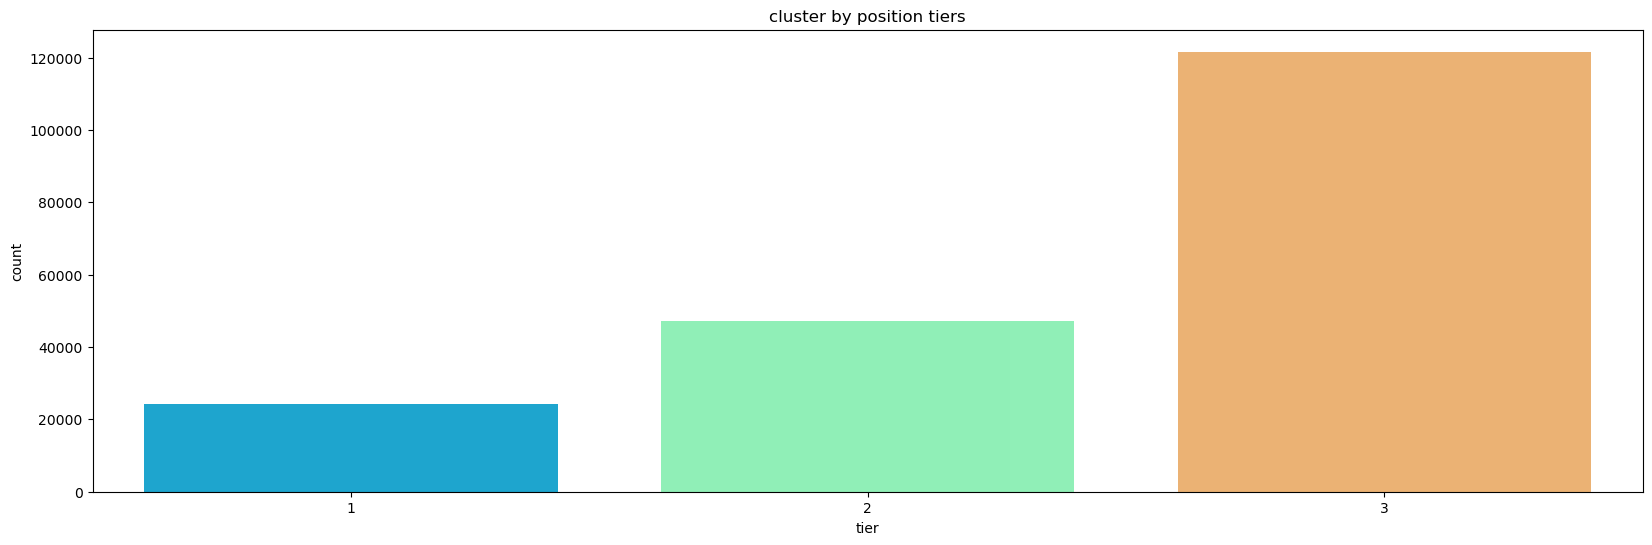

In [90]:
plt.figure(figsize=(20,6))
sns.countplot(x=scaler_ctc["tier"], palette="rainbow")
plt.title("cluster by position tiers")

Text(0.5, 1.0, 'cluster of top 3 companies')

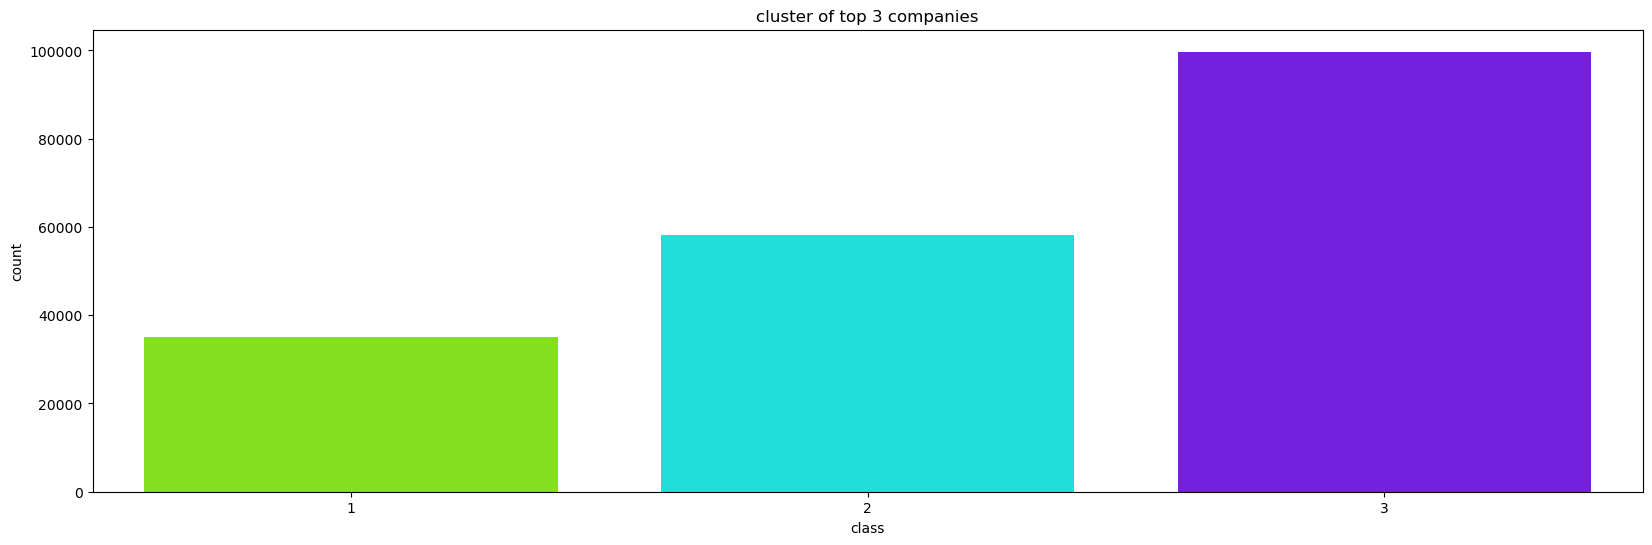

In [91]:
plt.figure(figsize=(20,6))
sns.countplot(x=scaler_ctc["class"], palette="hsv")
plt.title("cluster of top 3 companies")

In [92]:
scaler_ctc.to_csv("datactic.csv", index=False)
jobavg_sal.to_csv("avgsal.csv", index=False)

In [93]:
scaler_ctc = pd.read_csv("datactic.csv")
jobavg_sal= pd.read_csv("avgsal.csv")

In [94]:
scaler_ctc.head()

,company_hash,email_hash,ctc,job_position,designation,class,tier
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,1100000,Other,2,2,3
1,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2000000,Backend Engineer,1,1,2
2,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,700000,Backend Engineer,3,3,2
3,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,1400000,FullStack Engineer,2,2,3
4,yvuuxrj hzbvqqxta bvqptnxzs ucn rna,18f2c4aa2ac9dd3ae8ff74f32d30413f5165565b90d8f2...,700000,FullStack Engineer,3,3,3


In [95]:
jobavg_sal.head()

,job_position,ctc
0,Security Intern,11000000.0
1,Electric power supply,10000000.0
2,Toyota,10000000.0
3,"Associate Director, Online Products",7000000.0
4,"Senior Manager, Online Products",7000000.0


In [96]:
x = jobavg_sal.job_position.to_list()
y = jobavg_sal.ctc.to_list()
job_sal_dict = dict(zip(x,y))
joblist = scaler_ctc.job_position.to_list()
jobsal = []

for jobs in joblist:
    if pd.isnull(jobs):
        jobsal.append(None)
    else:
        jobsal.append(job_sal_dict.get(jobs))
len(jobsal)

192988

In [97]:
scaler_ctc["job_position_encoded"] = jobsal
scaler_ctc.head()

,company_hash,email_hash,ctc,job_position,designation,class,tier,job_position_encoded
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,1100000,Other,2,2,3,1077581.20
1,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2000000,Backend Engineer,1,1,2,1508207.54
2,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,700000,Backend Engineer,3,3,2,1508207.54
3,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,1400000,FullStack Engineer,2,2,3,1251468.13
4,yvuuxrj hzbvqqxta bvqptnxzs ucn rna,18f2c4aa2ac9dd3ae8ff74f32d30413f5165565b90d8f2...,700000,FullStack Engineer,3,3,3,1251468.13


In [98]:
scalerdata_encoded = scaler_ctc[:]
scalerdata_encoded["company_encoded"] = scaler_ctc["class"]
scalerdata_encoded["email_encoded"] = scaler_ctc["designation"]
scalerdata_encoded["job_position_encoded"] = scaler_ctc["job_position_encoded"]
scalerdata_encoded.head()

C:\Users\5040876\AppData\Local\Temp\ipykernel_3096\3873271322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scalerdata_encoded["company_encoded"] = scaler_ctc["class"]
C:\Users\5040876\AppData\Local\Temp\ipykernel_3096\3873271322.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scalerdata_encoded["email_encoded"] = scaler_ctc["designation"]
C:\Users\5040876\AppData\Local\Temp\ipykernel_3096\3873271322.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,company_hash,email_hash,ctc,job_position,designation,class,tier,job_position_encoded,company_encoded,email_encoded
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,1100000,Other,2,2,3,1077581.20,2,2
1,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2000000,Backend Engineer,1,1,2,1508207.54,1,1
2,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,700000,Backend Engineer,3,3,2,1508207.54,3,3
3,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,1400000,FullStack Engineer,2,2,3,1251468.13,2,2
4,yvuuxrj hzbvqqxta bvqptnxzs ucn rna,18f2c4aa2ac9dd3ae8ff74f32d30413f5165565b90d8f2...,700000,FullStack Engineer,3,3,3,1251468.13,3,3


In [108]:
scalerdata_encoded_numeric = scalerdata_encoded.select_dtypes(["number"])
scalerdata_encoded_numeric.head()

,ctc,designation,class,tier,job_position_encoded,company_encoded,email_encoded
0,1100000,2,2,3,1077581.20,2,2
1,2000000,1,1,2,1508207.54,1,1
2,700000,3,3,2,1508207.54,3,3
3,1400000,2,2,3,1251468.13,2,2
4,700000,3,3,3,1251468.13,3,3


In [118]:
# standarize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scalerdata_scaled = scaler.fit_transform(scalerdata_encoded_numeric)
scalerdata_scaled = pd.DataFrame(scalerdata_scaled, columns = scalerdata_encoded_numeric.columns)
scalerdata_scaled.head()

,ctc,designation,class,tier,job_position_encoded,company_encoded,email_encoded
0,-0.110745,0.043021,-0.438075,0.699717,-0.684836,-0.438075,0.043021
1,0.349399,-1.024008,-1.744833,-0.713351,0.371191,-1.744833,-1.024008
2,-0.315254,1.110050,0.868682,-0.713351,0.371191,0.868682,1.110050
3,0.042636,0.043021,-0.438075,0.699717,-0.258412,-0.438075,0.043021
4,-0.315254,1.110050,0.868682,0.699717,-0.258412,0.868682,1.110050


In [123]:
kmeans.cluster_centers_

array([[-0.34849956,  1.08915187,  0.6951724 ,  0.42661928, -0.15041104,
         0.6951724 ,  1.08915187],
       [ 0.96566767, -0.89556147, -1.59826775, -1.23856517,  0.5384979 ,
        -1.59826775, -0.89556147],
       [-0.13268542, -0.75464479,  0.08396294,  0.19351969, -0.12432698,
         0.08396294, -0.75464479]])

In [125]:
scalerdata_scaled["clusters"] = kmeans.labels_
scalerdata_scaled.head()


,ctc,designation,class,tier,job_position_encoded,company_encoded,email_encoded,clusters
0,-0.110745,0.043021,-0.438075,0.699717,-0.796145,-0.438075,0.043021,2
1,0.349399,-1.024008,-1.744833,-0.713351,0.431522,-1.744833,-1.024008,1
2,-0.315254,1.110050,0.868682,-0.713351,0.431522,0.868682,1.110050,0
3,0.042636,0.043021,-0.438075,0.699717,-0.300413,-0.438075,0.043021,2
4,-0.315254,1.110050,0.868682,0.699717,-0.300413,0.868682,1.110050,0


In [ ]:
scaler_ctc["clusters"] = kmeans.labels_
scalerdata_scaled.head()

In [126]:
scaler_ctc["clusters"] = scalerdata_scaled["clusters"]
scalerdata_scaled.head()

,ctc,designation,class,tier,job_position_encoded,company_encoded,email_encoded,clusters
0,-0.110745,0.043021,-0.438075,0.699717,-0.796145,-0.438075,0.043021,2
1,0.349399,-1.024008,-1.744833,-0.713351,0.431522,-1.744833,-1.024008,1
2,-0.315254,1.110050,0.868682,-0.713351,0.431522,0.868682,1.110050,0
3,0.042636,0.043021,-0.438075,0.699717,-0.300413,-0.438075,0.043021,2
4,-0.315254,1.110050,0.868682,0.699717,-0.300413,0.868682,1.110050,0


## using elbow method to find the best k

In [127]:
sse = []

for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=20, n_init=10)
    kmeans.fit(scalerdata_scaled)
    sse.append(kmeans.inertia_)

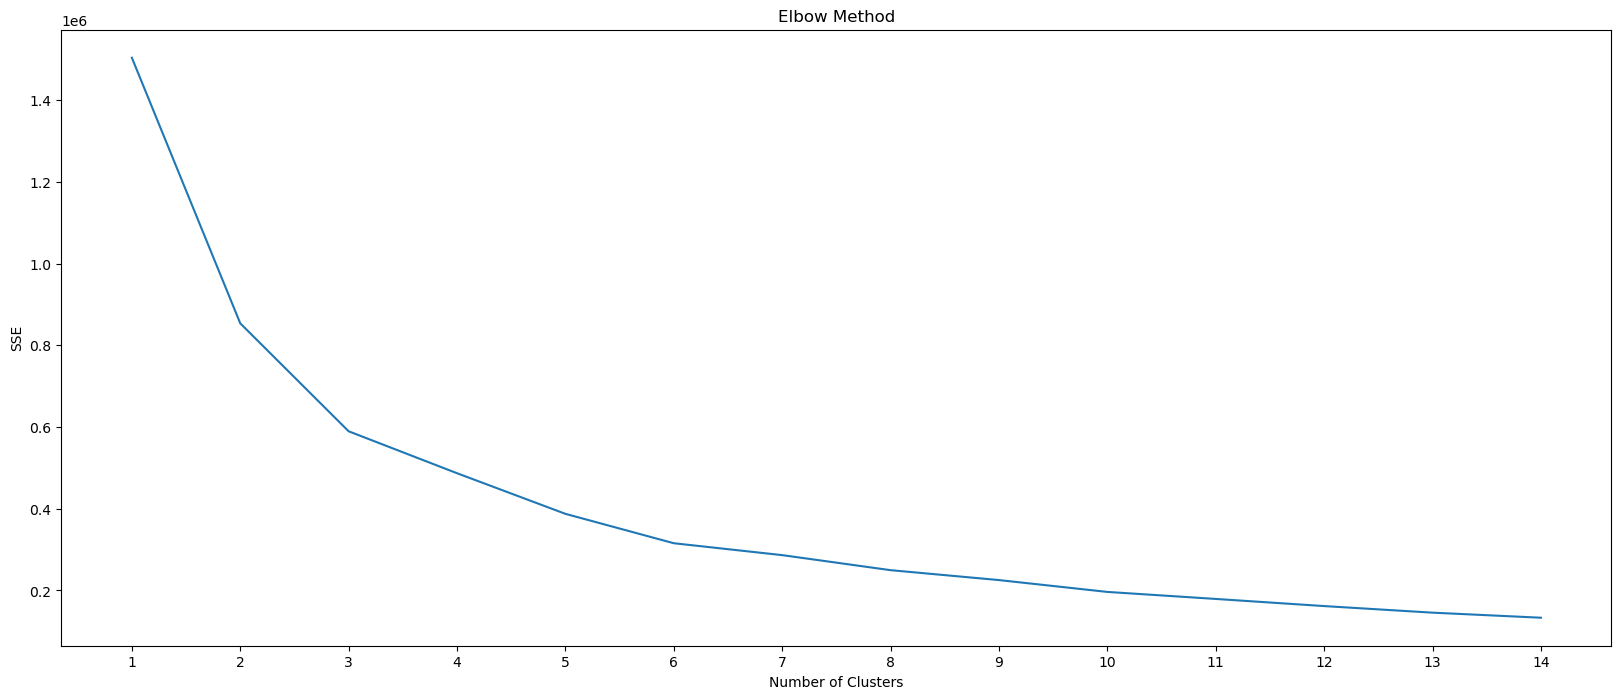

In [128]:
plt.figure(figsize = (20,8))
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# silhoutte score calculation
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(2,6 ):
 
    kmeans = KMeans(n_clusters=k,random_state = 20)

    kmeans.fit(scalerdata_scaled)
    print(kmeans.labels_.shape)


    score = silhouette_score(scalerdata_scaled , kmeans.labels_)

    silhouette_scores.append(score)

In [ ]:
# #plotting silhouette scores
# plt.figure(figsize = (8,5))
# plt.plot(range(2, 6), silhouette_scores)
# plt.xticks(range(2, 6))
# plt.title("Silhouette Score for Clusters")
# plt.xlabel("Number of Clusters")
# plt.ylabel("Silhouette Score")
# plt.show()

In [129]:
kmeans = KMeans(n_clusters = 5, random_state = 20)
kmeans.fit(scalerdata_scaled)

C:\Users\5040876\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=20)

In [130]:
scaler_ctc["clusters"] = kmeans.labels_
scaler_ctc.head(10)

,company_hash,email_hash,ctc,job_position,designation,class,tier,job_position_encoded,clusters
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,1100000,Other,2,2,3,1077581.20,1
1,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2000000,Backend Engineer,1,1,2,1508207.54,4
2,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,700000,Backend Engineer,3,3,2,1508207.54,0
3,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,1400000,FullStack Engineer,2,2,3,1251468.13,1
4,yvuuxrj hzbvqqxta bvqptnxzs ucn rna,18f2c4aa2ac9dd3ae8ff74f32d30413f5165565b90d8f2...,700000,FullStack Engineer,3,3,3,1251468.13,0
5,lubgqsvz wyvot wg,9bf128ae3f4ea26c7a38b9cdc58cf2acbb8592100c4128...,1500000,FullStack Engineer,1,2,2,1251468.13,1
6,vwwtznhqt ntwyzgrgsj,756d35a7f6bb8ffeaffc8fcca9ddbb78e7450fa0de2be0...,400000,Backend Engineer,3,3,3,1508207.54,0
7,utqoxontzn ojontbo,e245da546bf50eba09cb7c9976926bd56557d1ac9a17fb...,450000,other,1,3,3,NaN,1
8,xrbhd,b2dc928f4c22a9860b4a427efb8ab761e1ce0015fba1a5...,360000,other,1,3,3,NaN,1
9,ztfstz ogenfvqt,580f6368103ecb3c4f90245af63340e0b8a7a2dc946c1c...,420000,FullStack Engineer,3,3,3,1251468.13,0


In [131]:
scaler_ctc.clusters.value_counts()


0    79127
1    71456
4    33954
2     8332
3      119
Name: clusters, dtype: int64

<Axes: title={'center': 'number of clusters = 5'}, xlabel='clusters', ylabel='count'>

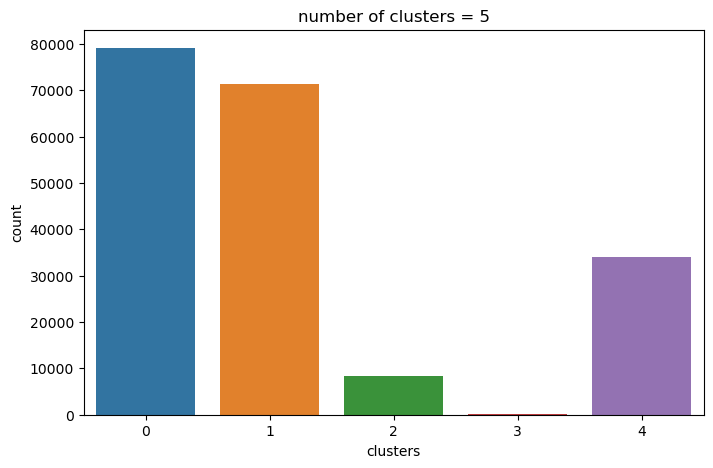

In [132]:
plt.figure(figsize = (8,5))
plt.title("number of clusters = 5")
sns.countplot(x = scaler_ctc["clusters"])

In [133]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram


In [134]:
scaler = pd.read_csv("scaler_kmeans.csv")
tmp = scaler.sample(frac=0.1)
tmp.shape

(20584, 7)

In [135]:
def plot_dendrogram(model, **kwargs):
# Create linkage matrix and then plot the dendrogram
# create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count +=1 # leaf node
            else:
                current_count += count[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    


In [136]:
# model = AgglomerativeClustering(distance_threshold =0, n_clusters=None, compute_distances=True,linkage='average').fit(tmp)
# plt.figure(figsize=(25,20))
# plt.title("Hierarchical Clustering Dendrogram (Avg Linkage)")
# plot_dendrogram(model, truncate_mode="level", p=6)
# plt.xlabel("Number of points in node (or index of point if no parenthesis).")
# plt.show()


## Insights and Recommendations :


## INSIGHTS:

### Most popular job positions are:

## Highest CTC are offered by these companies:

## Some of the highest paid positions :

## other

## RECOMMENDATIONS :
